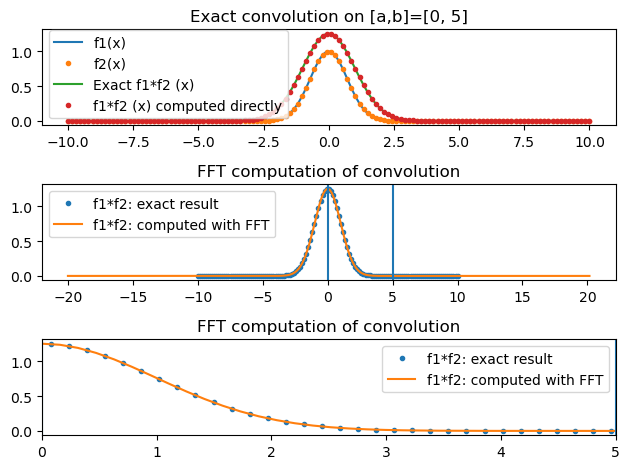

In [12]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.fft as fft
from scipy.special import erf

N = 64
a = 0
b = 5
aa = -10
bb = 10
x = np.linspace(aa, bb, 2*N)
dx = np.diff(x)[0]

f1 = np.exp(-x**2)
f2 = np.exp(-x**2)

# exact convolution
fe = .5*np.exp(-x**2/2)*\
        np.sqrt(np.pi/2)*\
        (-erf((2*aa-x)/np.sqrt(2))+erf((2*bb-x)/np.sqrt(2)))

# computation on real domain
c = np.zeros(x.size)
for i in range(x.size):
    c[i]=np.trapz(np.exp(-x**2)*np.exp(-(x-x[i])**2), x)


f3 = fft.ifft(fft.fft(f1)*fft.fft(f2)).real*dx

#f31 = fft.ifft(fft.fft(np.concatenate((f1, np.zeros(N-1))))*\
#               fft.fft(np.concatenate((f2, np.zeros(N-1))))
#               ).real*dx

f31 = fft.ifft(np.multiply(fft.fft(np.concatenate((f1, np.zeros(2*N)))),
               fft.fft(np.concatenate((f2, np.zeros(2*N)))))
               ).real*dx


x1 = np.arange(x[0], x[0] + f31.size*dx, dx)

plt.figure()

plt.subplot(3,1,1)
plt.plot(x, f1, label = 'f1(x)');
plt.plot(x, f2, '.', label = 'f2(x)');
plt.plot(x, fe, label = 'Exact f1*f2 (x)');
plt.plot(x, c, '.', label = 'f1*f2 (x) computed directly');
plt.legend()
plt.title(f"Exact convolution on [a,b]=[{a}, {b}]");

plt.subplot(3,1,2)
plt.plot(x, fe,'.', label = 'f1*f2: exact result');
plt.plot(x1+aa, f31, label = 'f1*f2: computed with FFT')
plt.axvline(a)
plt.axvline(b)
plt.legend()
plt.title('FFT computation of convolution');
plt.tight_layout();


plt.subplot(3,1,3)
plt.plot(x, fe,'.', label = 'f1*f2: exact result');
plt.plot(x1+aa, f31, label = 'f1*f2: computed with FFT')
plt.axvline(a)
plt.axvline(b)
plt.legend()
plt.title('FFT computation of convolution');
plt.xlim([a,b])
plt.tight_layout();